In [1]:
import mysql.connector 
import pandas as pd    
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

In [2]:
_user='ifePVsystem'      # brukernavn
_password='Sol1Sinnet'   # passord
#_host='128.39.229.38'  
_host = 'kj-sol-01'        # evt. kj-sol-01, dette er adressen der serveren bor, og kan bare nåes på IFEs internnett (kabel eller VPN)
_database='pvs'          # navnet på databasen vår. En host kan ha flere databaser (som en blokk kan ha flere leiligheter)

In [4]:


query = f'SHOW TABLES'

connection = mysql.connector.connect(user=_user, password=_password, host=_host, database=_database)
tablesDF = pd.read_sql(query, con=connection)
connection.close()  


C:\Users\IFE12748\AppData\Local\Temp\ipykernel_25984\1653736175.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tablesDF = pd.read_sql(query, con=connection)


In [5]:

query = f"SHOW COLUMNS FROM `{'inverter_data'}`"

connection = mysql.connector.connect(user=_user, password=_password, host=_host, database=_database)
columnsDF = pd.read_sql(query, con=connection)
connection.close()  
columnsDF

C:\Users\IFE12748\AppData\Local\Temp\ipykernel_25984\686915122.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columnsDF = pd.read_sql(query, con=connection)


,Field,Type,Null,Key,Default,Extra
0,id_inverter_data,int(11) unsigned,NO,PRI,None,auto_increment
1,id_site,int(11) unsigned,NO,MUL,None,
2,date_time,datetime,NO,,None,
3,date_time_int5,int(10) unsigned,YES,MUL,None,
4,ac_power,"float(8,2)",YES,,None,
5,apparent_power,"float(8,2)",YES,,None,
6,ac_voltage,"float(6,2)",YES,,None,
7,ac_current,"float(6,2)",YES,,None,
8,dc_voltage,"float(6,2)",YES,,None,
9,dc_current,"float(6,2)",YES,,None,


In [387]:
start_time = '2023-02-01 00:00:00'
end_time = '2024-02-31 23:59:59'

cols = columnsDF.Field.iloc[4:]

string_cols = ', '.join(col for col in cols)

#df = pd.DataFrame(columns=cols)
#df.to_excel('names_temp_data.xlsx')

In [388]:

query = f'SELECT date_time, {string_cols}\
                 FROM temp_data\
                 WHERE date_time\
                 BETWEEN "{start_time}" AND "{end_time}"\
                 ORDER by date_time\
                 LIMIT 100000000'

connection = mysql.connector.connect(user=_user, password=_password, host=_host, database=_database)
dataDF = pd.read_sql(query, con=connection)
connection.close()  



C:\Users\IFE12748\AppData\Local\Temp\ipykernel_15004\1275253132.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataDF = pd.read_sql(query, con=connection)


DatabaseError: Execution failed on sql 'SELECT date_time, ac_power, apparent_power, ac_voltage, ac_current, dc_voltage, dc_current, dc_power                 FROM temp_data                 WHERE date_time                 BETWEEN "2023-02-01 00:00:00" AND "2024-02-31 23:59:59"                 ORDER by date_time                 LIMIT 100000000': 1054 (42S22): Unknown column 'ac_power' in 'field list'

In [ ]:
dataDF.index = dataDF.date_time

dataDF.iloc[20:,1:23]

In [389]:
dataDF.isna().sum()

date_time             0
ac_power          30157
apparent_power    79327
ac_voltage        68314
ac_current        68314
dc_voltage        44639
dc_current        51121
dc_power          62134
id_site               0
dtype: int64

In [390]:
len(set(dataDF.date_time))

51067

In [391]:
len(dataDF.date_time) - dataDF.isna().sum()

date_time         85809
ac_power          55652
apparent_power     6482
ac_voltage        17495
ac_current        17495
dc_voltage        41170
dc_current        34688
dc_power          23675
id_site           85809
dtype: int64

In [204]:
dataDF.describe()

,date_time,ac_power,apparent_power,ac_voltage,ac_current,dc_voltage,dc_current,id_site
count,14037,7681.000000,778.000000,5503.000000,5503.000000,5503.000000,4725.000000,14037.000000
mean,2023-01-16 09:53:20.291301632,12893.152797,209.115039,210.385041,0.658708,200.861114,0.630487,25.597991
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2023-01-08 15:15:00,0.030000,0.000000,237.800000,0.000000,136.100000,0.010000,2.000000
50%,2023-01-16 15:10:00,0.130000,206.750000,239.200000,0.250000,155.700000,0.100000,41.000000
75%,2023-01-24 09:10:00,2423.040000,301.000000,240.200000,0.840000,318.750000,0.390000,41.000000
max,2023-01-30 15:05:00,312519.500000,1436.000000,243.500000,6.020000,447.620000,6.800000,41.000000
std,NaN,40137.579594,215.257339,72.792964,0.967847,121.367976,1.253605,19.185901


<Axes: >

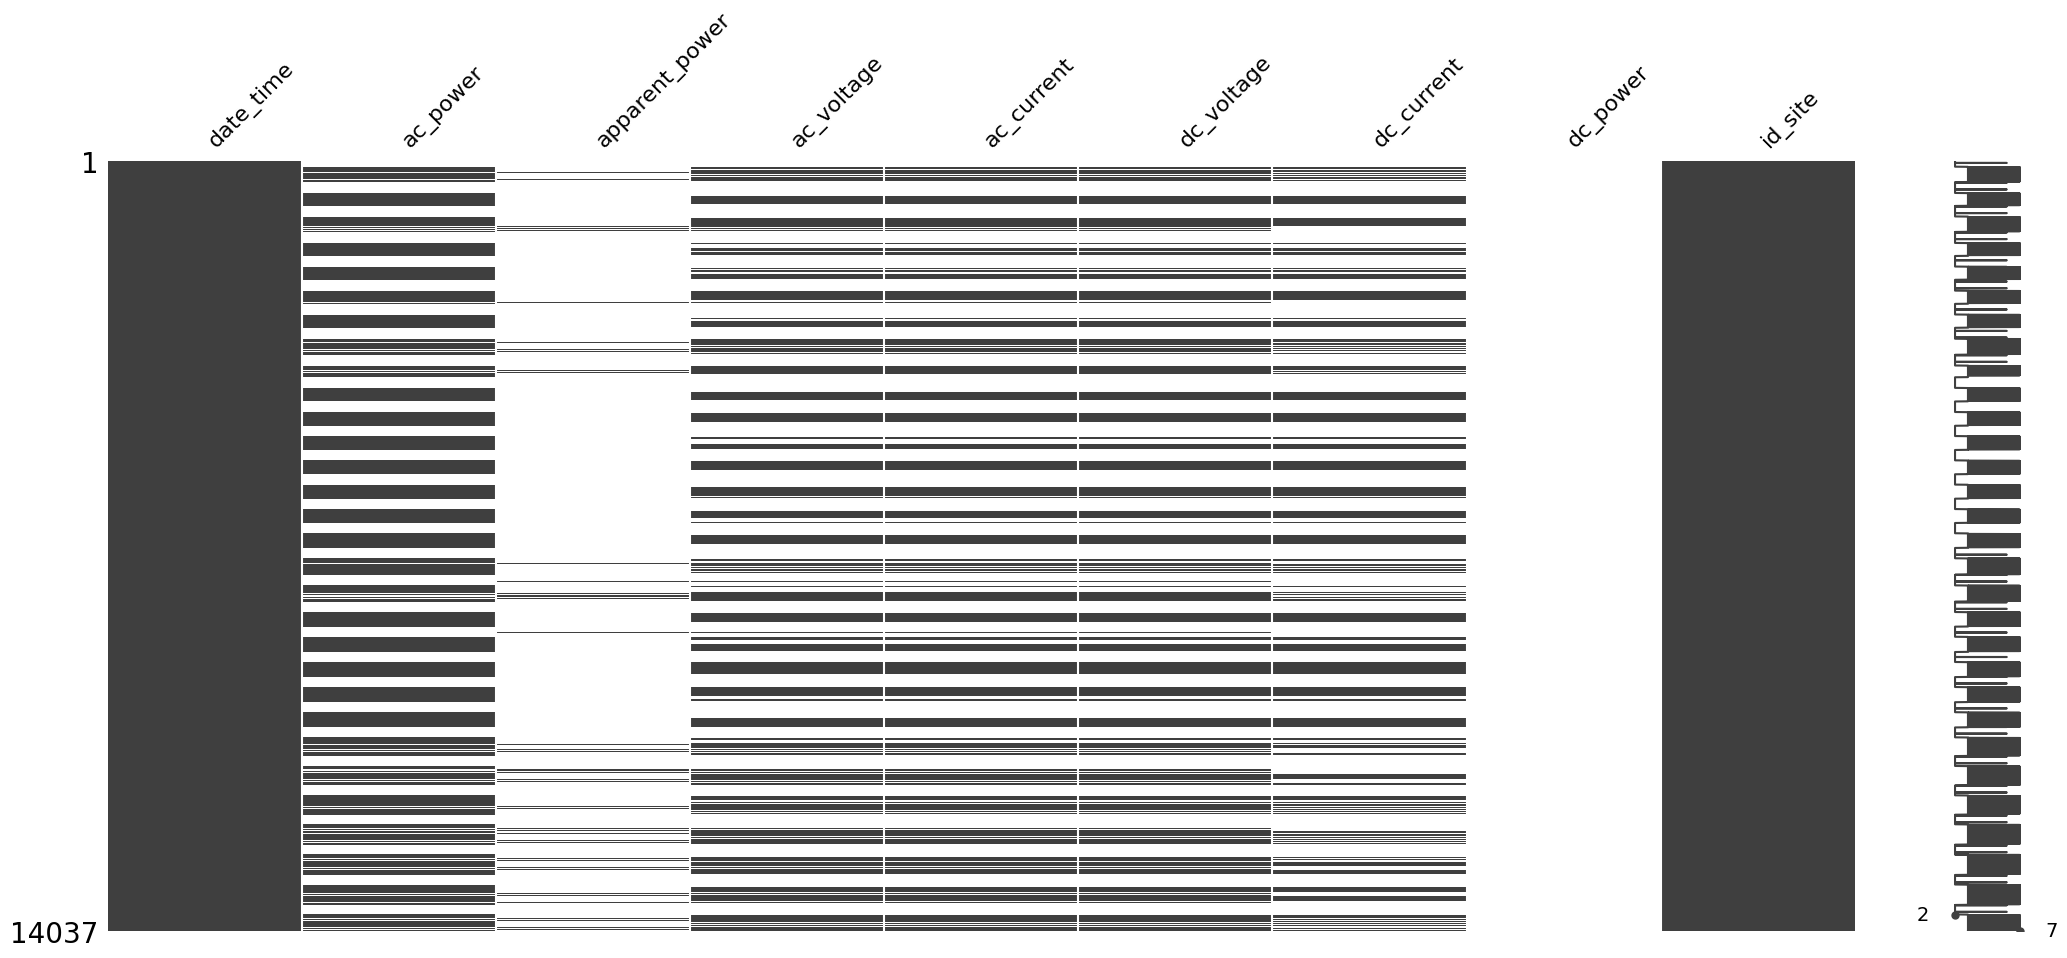

In [205]:
dataDF.index = dataDF.date_time
msno.matrix(dataDF)

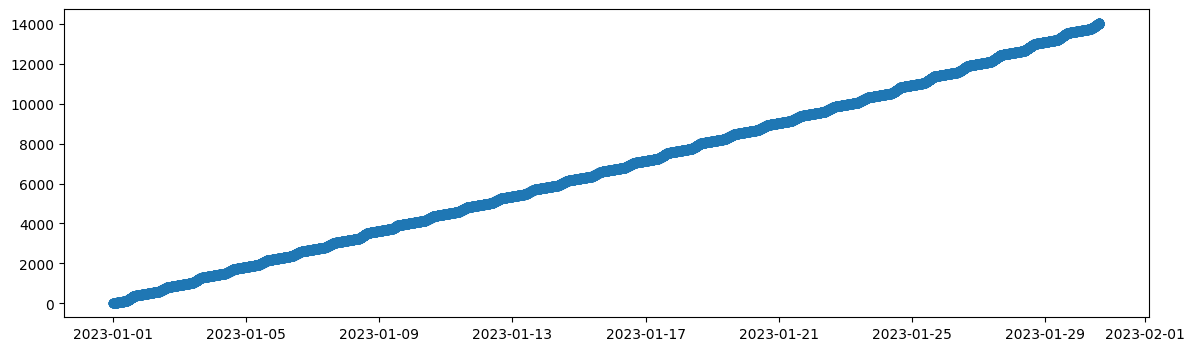

In [206]:
fig = plt.figure(figsize=(14,4))
plt.scatter(dataDF.date_time, range(len(dataDF.date_time)))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(13,6))

ind = pd.date_range('2021-01-01 00:00:00', '2021-12-31 23:59:59', freq=pd.Timedelta(seconds=1))
plt.plot(dataDF.date_time, dataDF.isna().astype(float), alpha = 0.5)
plt.legend(dataDF.iloc[:,25:].columns)

# Inverter_data

In [5]:

query = f"SHOW COLUMNS FROM `{'inverter_data'}`"

connection = mysql.connector.connect(user=_user, password=_password, host=_host, database=_database)
columnsDF = pd.read_sql(query, con=connection)
connection.close()  
columnsDF

C:\Users\IFE12748\AppData\Local\Temp\ipykernel_15004\686915122.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  columnsDF = pd.read_sql(query, con=connection)


,Field,Type,Null,Key,Default,Extra
0,id_inverter_data,int(11) unsigned,NO,PRI,None,auto_increment
1,id_site,int(11) unsigned,NO,MUL,None,
2,date_time,datetime,NO,,None,
3,date_time_int5,int(10) unsigned,YES,MUL,None,
4,ac_power,"float(8,2)",YES,,None,
5,apparent_power,"float(8,2)",YES,,None,
6,ac_voltage,"float(6,2)",YES,,None,
7,ac_current,"float(6,2)",YES,,None,
8,dc_voltage,"float(6,2)",YES,,None,
9,dc_current,"float(6,2)",YES,,None,


In [392]:
start_time = '2023-02-01 00:00:00'
end_time = '2024-07-31 23:59:59'

cols = columnsDF.Field.iloc[4:]

string_cols = ', '.join(col for col in cols) + ', ' + columnsDF.Field.iloc[1]

In [393]:
string_cols

'ac_power, apparent_power, ac_voltage, ac_current, dc_voltage, dc_current, dc_power, id_site'

In [394]:

query = f'SELECT date_time, {string_cols}\
                 FROM inverter_data\
                 WHERE date_time\
                 BETWEEN "{start_time}" AND "{end_time}"\
                 AND id_site >= 0 \
                 ORDER by date_time\
                 LIMIT 100000000'

#query = f'SELECT *\
#                 FROM inverter_data\
#                 WHERE date_time\
#                 BETWEEN "{start_time}" AND "{end_time}"\
#                 AND id_site >= 0 \
#                 ORDER by date_time\
#                 LIMIT 100000000'

connection = mysql.connector.connect(user=_user, password=_password, host=_host, database=_database)
dataDF = pd.read_sql(query, con=connection)
connection.close()  

dataDF.index = pd.to_datetime(dataDF.date_time)
#dataDF=dataDF.drop('date_time', axis=1)


C:\Users\IFE12748\AppData\Local\Temp\ipykernel_15004\1510928890.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataDF = pd.read_sql(query, con=connection)


In [395]:
dataDF

,date_time,ac_power,apparent_power,ac_voltage,ac_current,dc_voltage,dc_current,dc_power,id_site
date_time,,,,,,,,,


In [396]:
sites = list(set(dataDF.id_site))
dfs = [dataDF[dataDF['id_site'] == i] for i in sites]

sites

[]

In [397]:
for df, id in zip(dfs, sites):

    new_cols = []
    for col in df.columns:
        new_cols.append(f'{col}_{id}')
    df.columns = new_cols
#dataDF = pd.concat(dfs, axis=1)

In [398]:
for df in dfs:
    print(df.head(n=20))

In [399]:
for df in dfs:
    print(df.describe())
    print('')

In [400]:

for df in dfs:
    print(len(df.index) - df.isna().sum())
    print('')

In [401]:
for df in dfs:
    msno.matrix(df)
    plt.show()

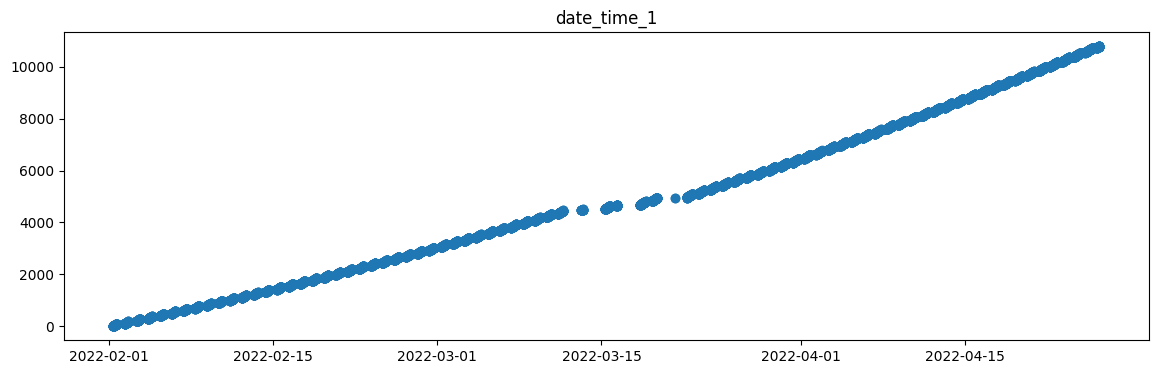

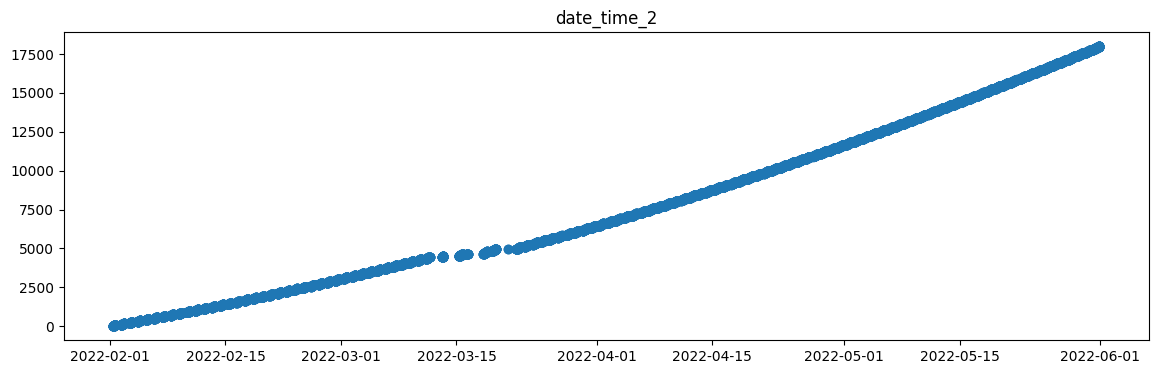

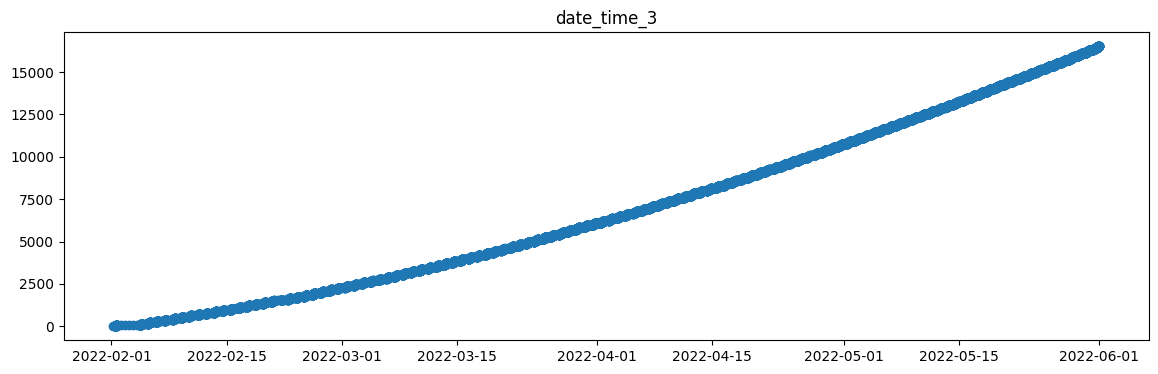

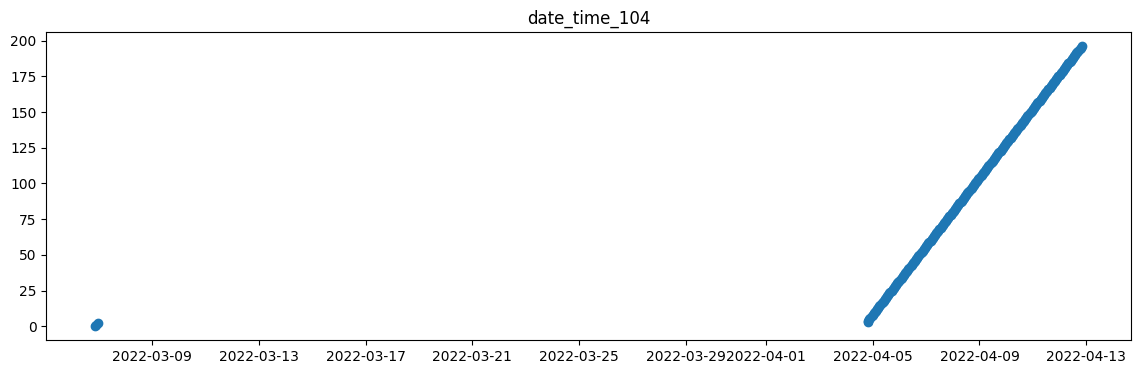

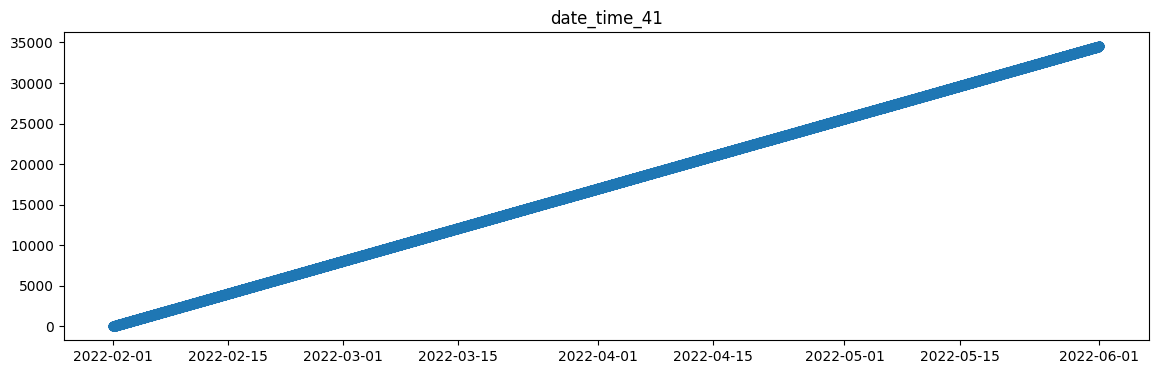

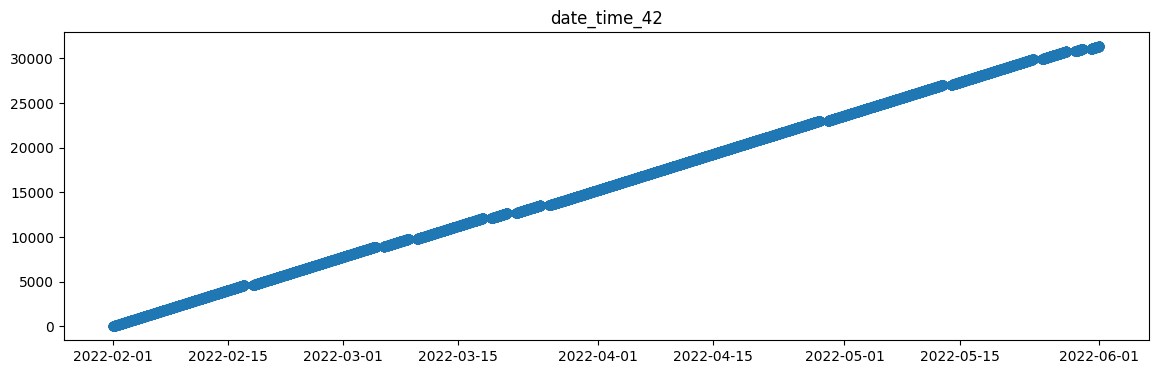

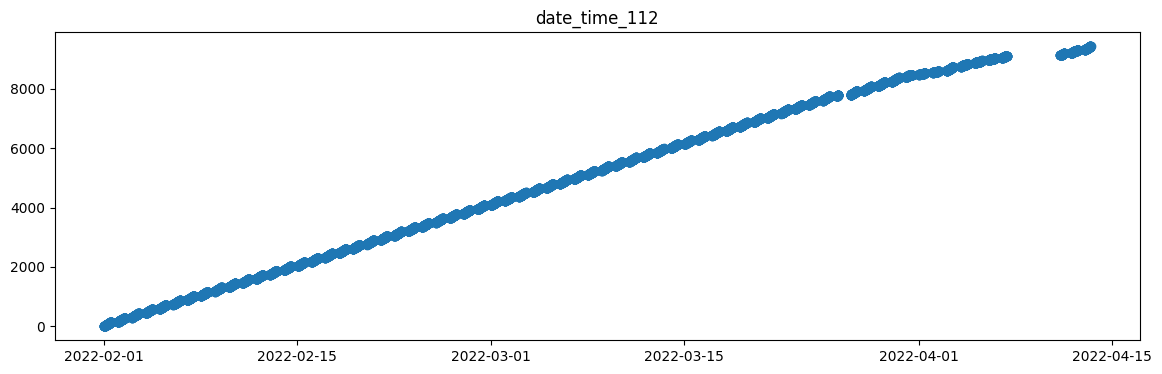

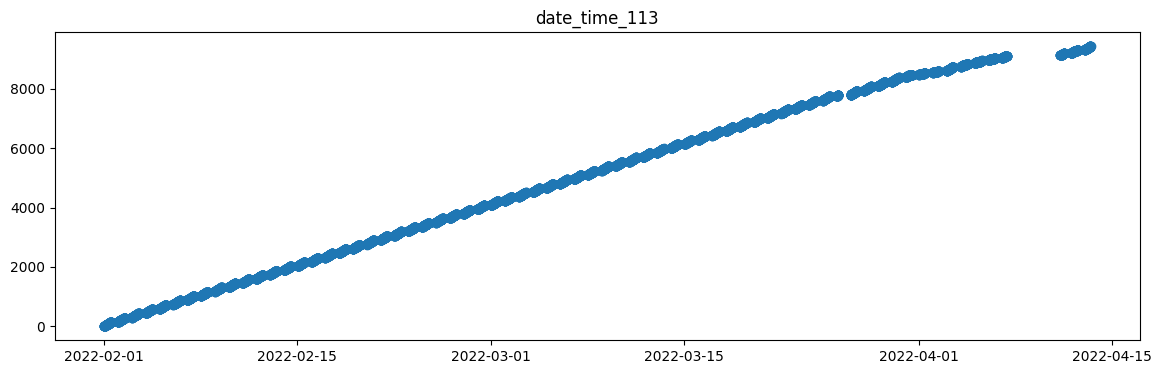

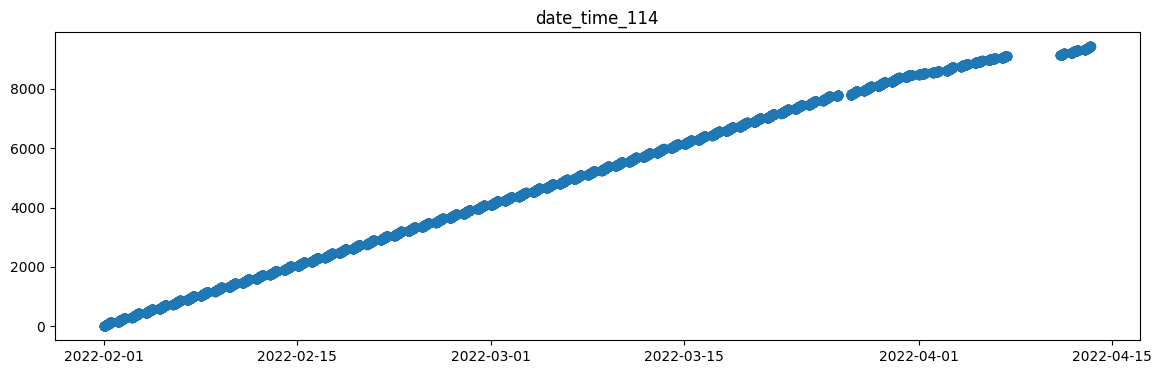

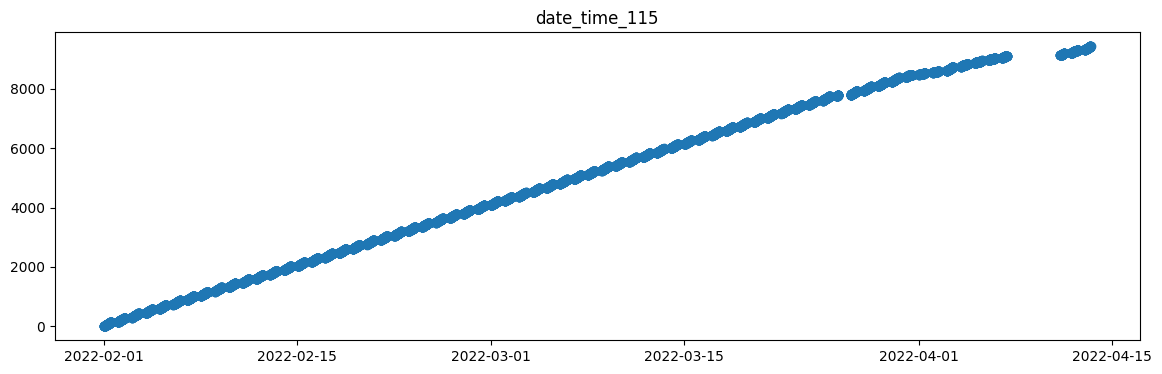

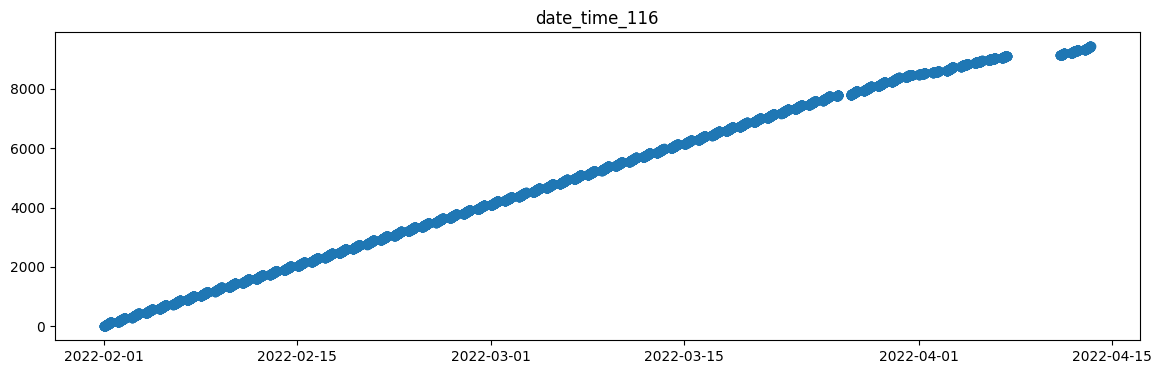

In [376]:

for df in dfs:
    fig = plt.figure(figsize=(14,4))
    plt.scatter(df.index, range(len(df.index)))
    plt.title(df.columns[0])

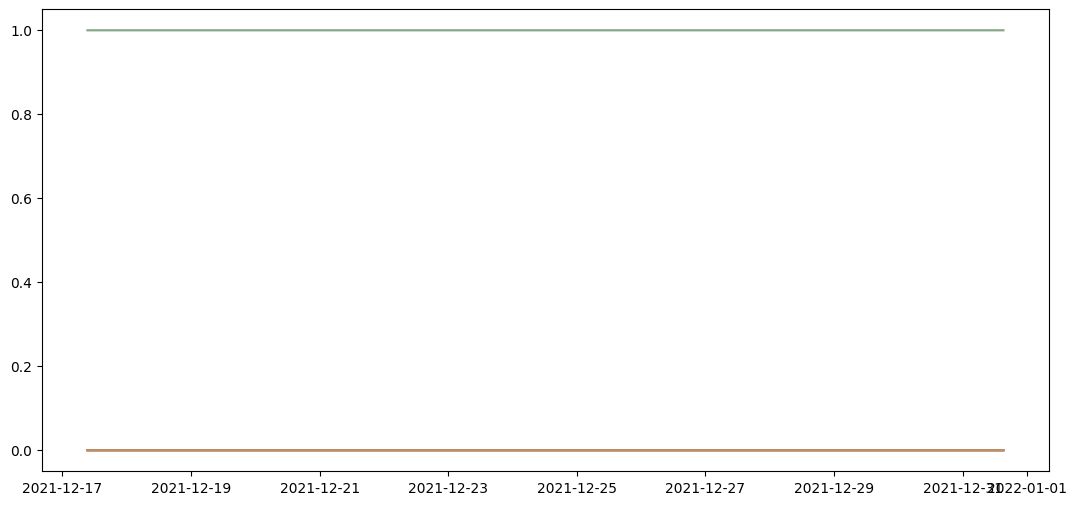

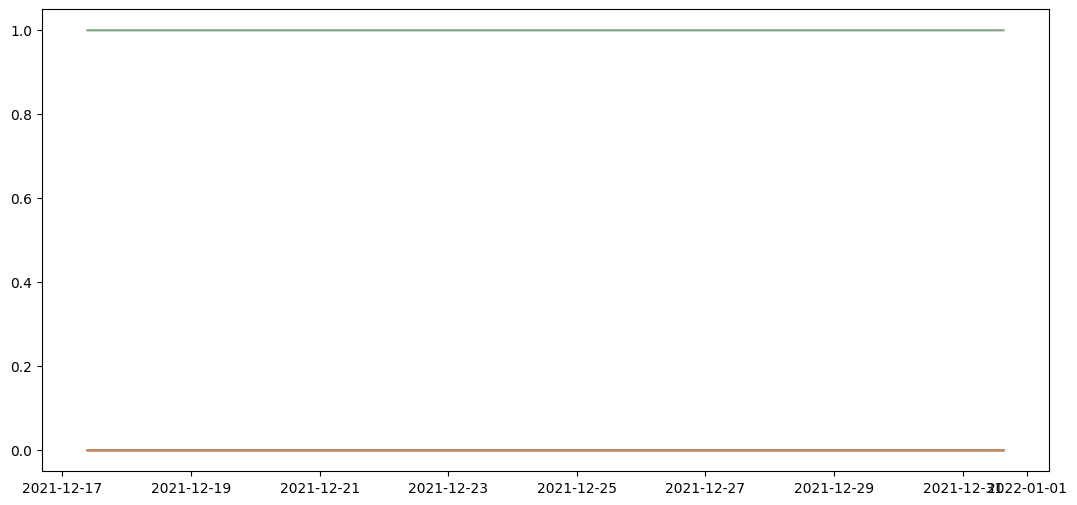

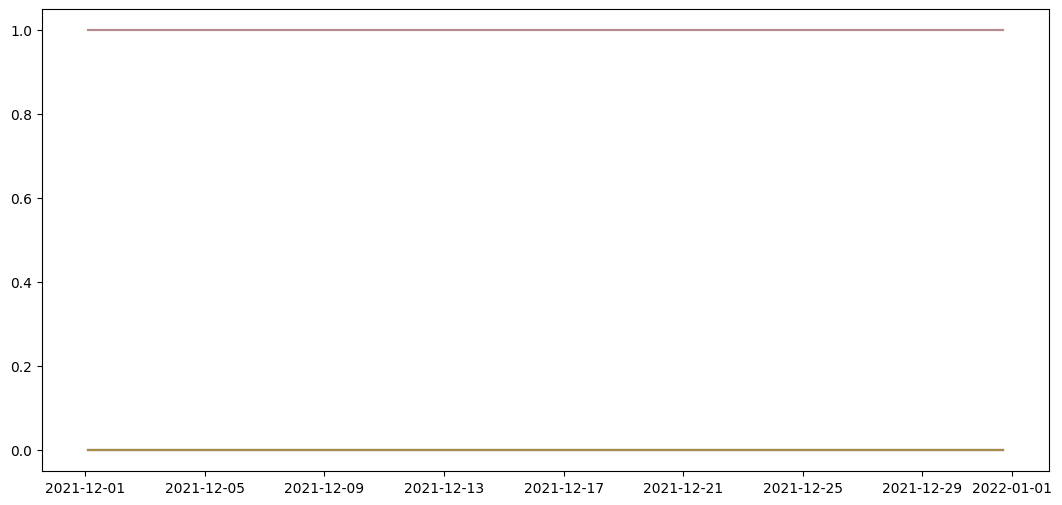

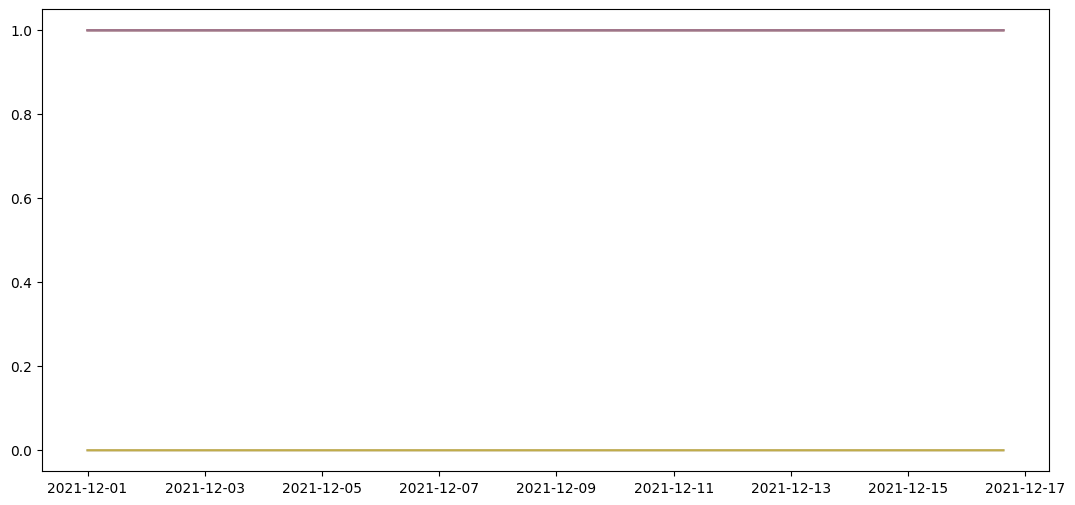

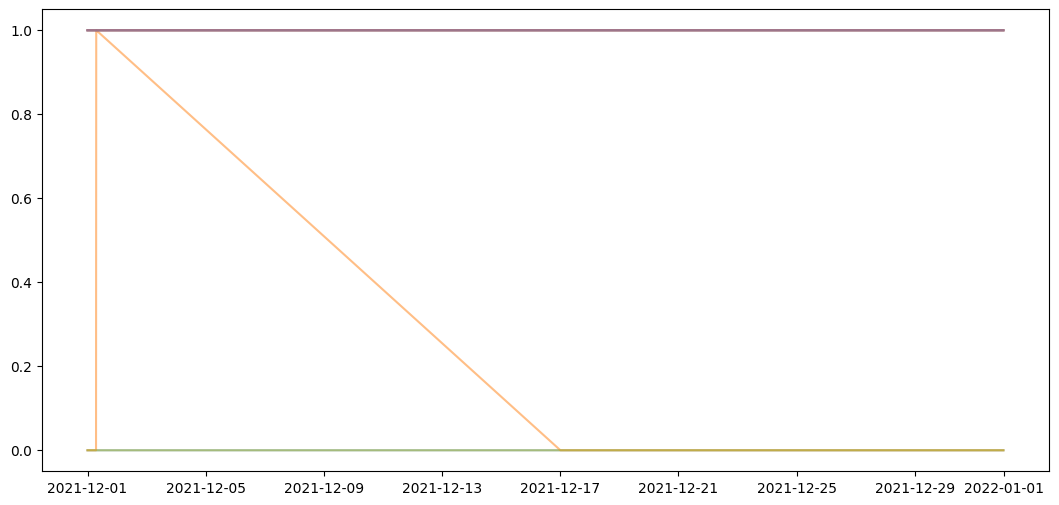

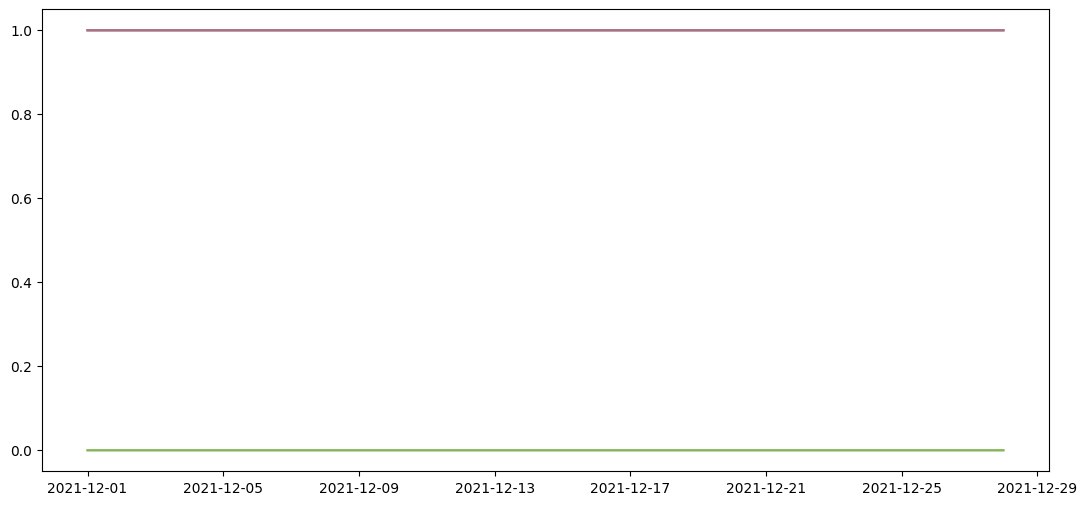

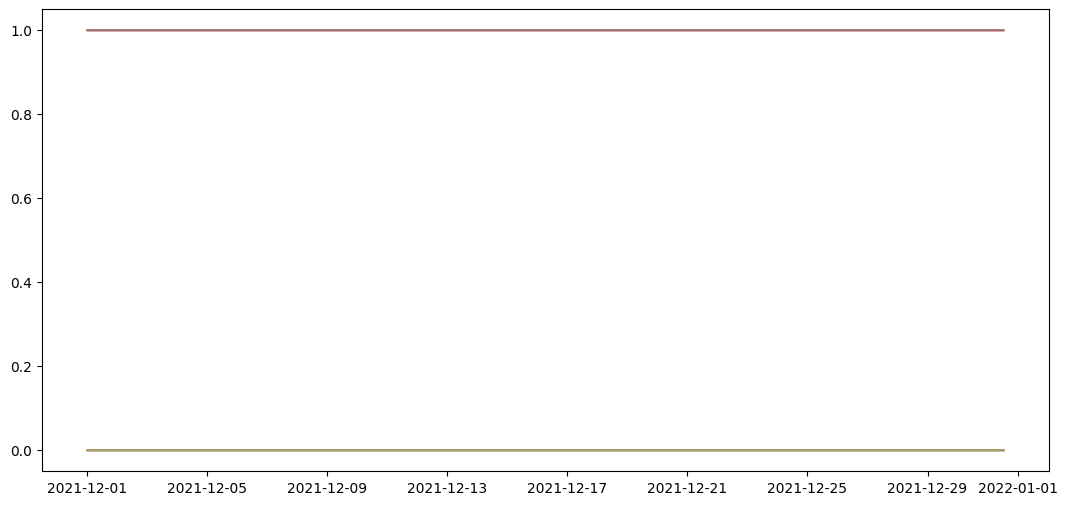

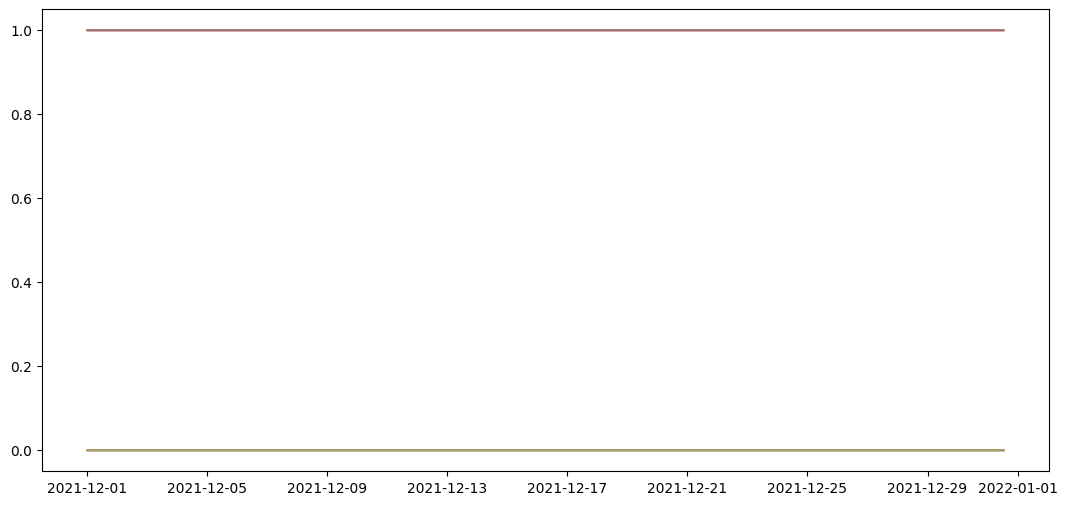

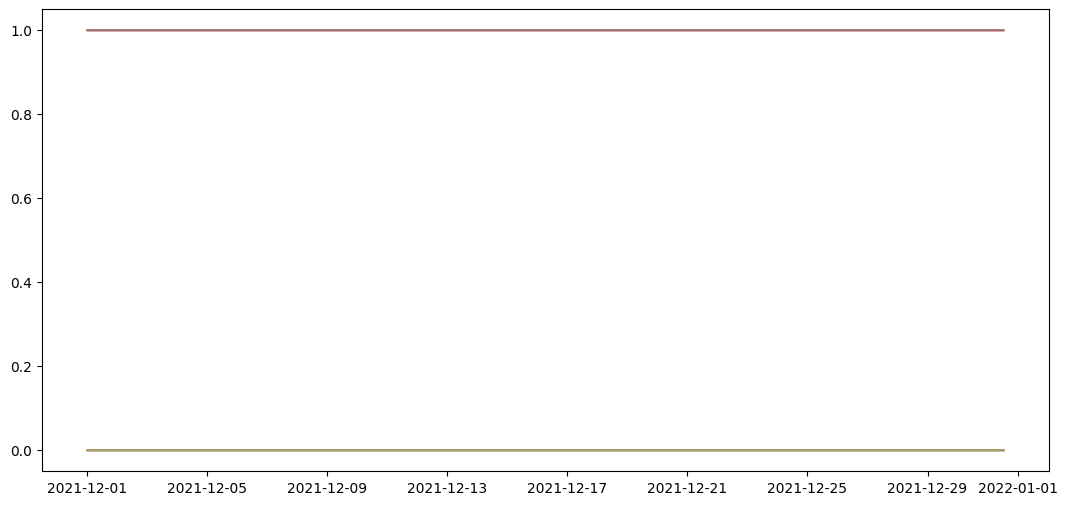

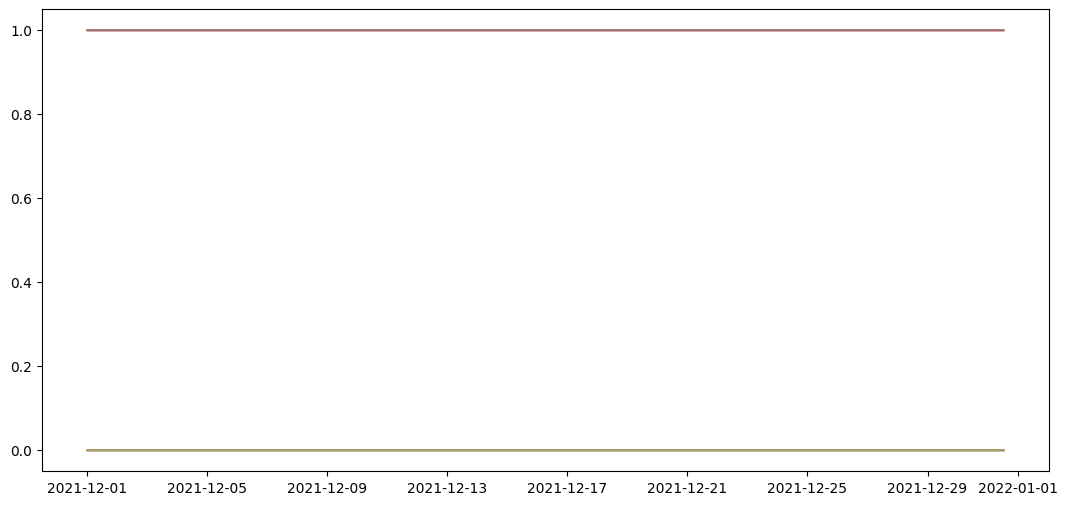

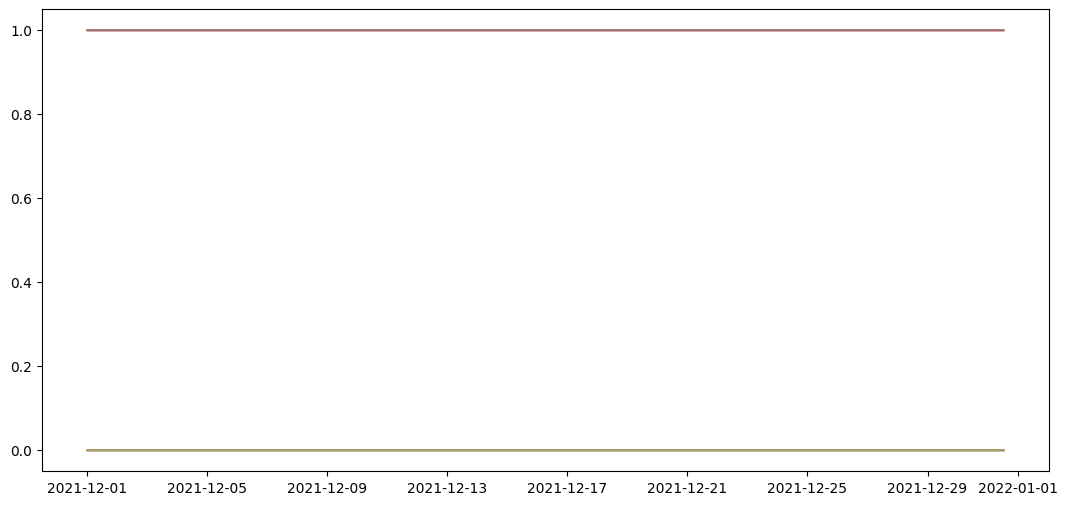

In [344]:

for df in dfs:
    fig, ax = plt.subplots(1,1,figsize=(13,6))
    
    ind = pd.date_range('2021-01-01 00:00:00', '2021-12-31 23:59:59', freq=pd.Timedelta(seconds=1))
    plt.plot(df.index, df.isna().astype(float), alpha = 0.5)
